In [280]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression,LinearRegression
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import time
import sys
import json
%matplotlib inline

In [281]:
df_uber = pd.read_csv(r'C:\Users\mashael\Desktop/sample_dataset.csv')

In [282]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1000000 non-null  int64  
 1   key                1000000 non-null  object 
 2   fare_amount        1000000 non-null  float64
 3   pickup_datetime    1000000 non-null  object 
 4   pickup_longitude   1000000 non-null  float64
 5   pickup_latitude    1000000 non-null  float64
 6   dropoff_longitude  999990 non-null   float64
 7   dropoff_latitude   999990 non-null   float64
 8   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 68.7+ MB


In [283]:
df_uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [284]:
df_uber.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
999995,999995,44:38.0,7.0,2014-09-13 21:44:38 UTC,-73.976676,40.785630,-73.959196,40.775114,1
999996,999996,50:37.0,7.3,2010-09-20 14:50:37 UTC,-73.992103,40.671385,-73.992103,40.671385,2
999997,999997,03:00.0,10.5,2013-04-26 14:03:00 UTC,-73.978423,40.751135,-73.993397,40.762197,5
999998,999998,29:00.0,6.9,2011-07-08 00:29:00 UTC,-73.980317,40.759482,-73.976832,40.743122,1
999999,999999,30:00.0,4.1,2009-12-31 14:30:00 UTC,-74.006635,40.741598,-73.999450,40.745702,1


# Check for missing data


In [285]:
df_uber.isnull().sum()

Unnamed: 0            0
key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [286]:
#Checking for null values
df_uber.dropna(inplace=True)

In [287]:
df_uber.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

#  add some useful columns

In [288]:
df_uber['pickup_datetime'] = df_uber['pickup_datetime'].map(pd.to_datetime)

In [289]:
# add  more suitable columns
df_uber['year'] = df_uber['pickup_datetime'].dt.year
df_uber['month'] = df_uber['pickup_datetime'].dt.month
df_uber['day'] = df_uber['pickup_datetime'].dt.day
df_uber['hour']=df_uber['pickup_datetime'].dt.hour
df_uber['weekday']=df_uber['pickup_datetime'].dt.day_name()


In [290]:
df_uber.head(10)


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,weekday
0,0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,Monday
1,1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,Tuesday
2,2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,Thursday
3,3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,Saturday
4,4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,Tuesday
5,5,50:45.0,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1,2011,1,6,9,Thursday
6,6,35:00.0,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1,2012,11,20,20,Tuesday
7,7,22:00.0,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1,2012,1,4,17,Wednesday
8,8,10:00.0,9.0,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1,2012,12,3,13,Monday
9,9,11:00.0,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2,2009,9,2,1,Wednesday


In [291]:
df_uber.tail(10)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,weekday
999990,999990,43:00.0,6.1,2009-09-22 16:43:00+00:00,-73.963472,40.774893,-73.980038,40.777478,1,2009,9,22,16,Tuesday
999991,999991,17:51.0,8.9,2010-04-20 08:17:51+00:00,-73.973683,40.792300,-73.979603,40.765361,1,2010,4,20,8,Tuesday
999992,999992,57:27.0,5.7,2011-01-21 10:57:27+00:00,-73.976733,40.790480,-73.988215,40.779298,1,2011,1,21,10,Friday
999993,999993,08:00.0,15.0,2012-12-14 11:08:00+00:00,-73.975895,40.728558,-74.002202,40.755675,2,2012,12,14,11,Friday
999994,999994,57:55.0,20.0,2014-06-29 22:57:55+00:00,-73.872919,40.774106,-73.796524,40.775041,2,2014,6,29,22,Sunday
999995,999995,44:38.0,7.0,2014-09-13 21:44:38+00:00,-73.976676,40.785630,-73.959196,40.775114,1,2014,9,13,21,Saturday
999996,999996,50:37.0,7.3,2010-09-20 14:50:37+00:00,-73.992103,40.671385,-73.992103,40.671385,2,2010,9,20,14,Monday
999997,999997,03:00.0,10.5,2013-04-26 14:03:00+00:00,-73.978423,40.751135,-73.993397,40.762197,5,2013,4,26,14,Friday
999998,999998,29:00.0,6.9,2011-07-08 00:29:00+00:00,-73.980317,40.759482,-73.976832,40.743122,1,2011,7,8,0,Friday
999999,999999,30:00.0,4.1,2009-12-31 14:30:00+00:00,-74.006635,40.741598,-73.999450,40.745702,1,2009,12,31,14,Thursday


# Analyzing Data

1. The effect of time on demand for Uber rides: distribution per hour, day, weekday and month.

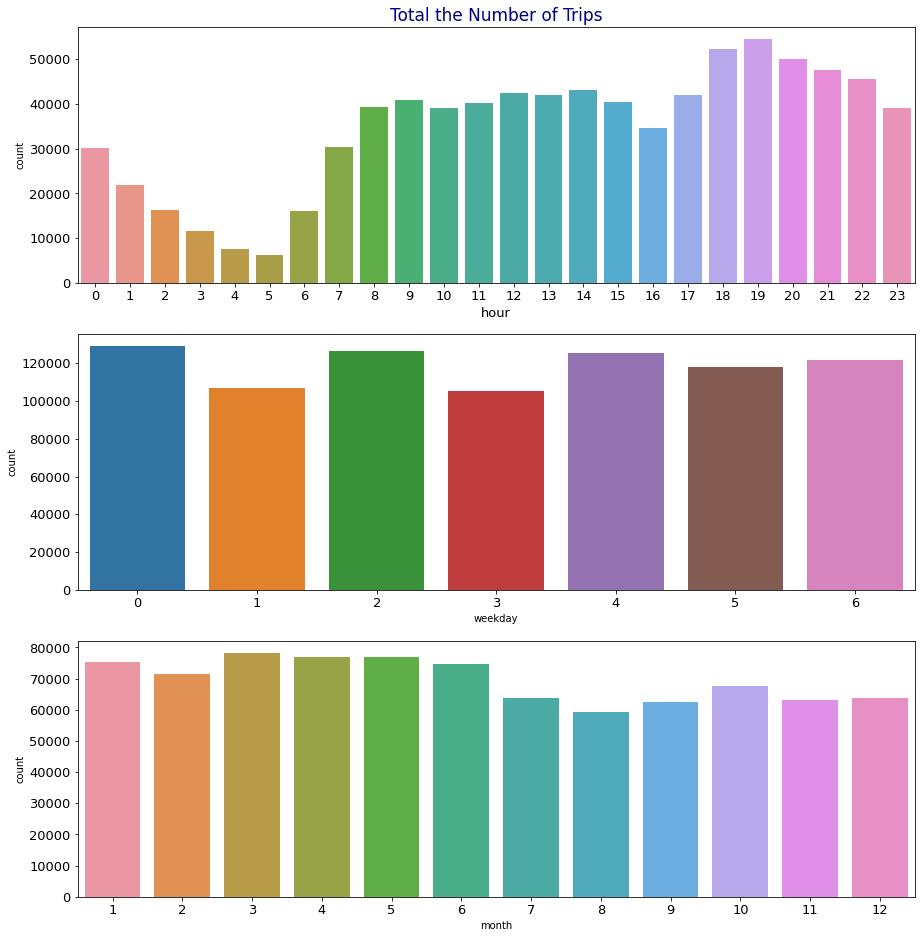

In [312]:
# Create plots comparing demand per different time categories:
fig = plt.figure(figsize = (15,16))

plt.subplot(3,1,1) 
ax1 = sns.countplot(df_uber.hour, order = range(24))
plt.tick_params(labelsize=13)
plt.title('Total the Number of Trips', fontsize=17, color='navy')
plt.xlabel('hour', fontsize=13)



plt.subplot(3,1,2)
ax2 = sns.countplot(df_uber.weekday)
plt.tick_params(labelsize=13)
plt.xlabel('weekday')



plt.subplot(3,1,3)
ax2 = sns.countplot(df_uber.month)
plt.tick_params(labelsize=13)
plt.xlabel('month')


plt.show()

2. Weekends vs Weekdays : Difference in average number of pickups on weekdays and weekends

In [293]:
week_day=pd.DataFrame(df_uber['weekday'].value_counts())
week_day

,weekday
Friday,154245
Saturday,151279
Thursday,149668
Wednesday,144838
Tuesday,139985
Sunday,131300
Monday,128675


In [294]:
week_day['day_type']=['wd','wd','wd','wd','we','wd','we']

In [295]:
week_day

,weekday,day_type
Friday,154245,wd
Saturday,151279,wd
Thursday,149668,wd
Wednesday,144838,wd
Tuesday,139985,we
Sunday,131300,wd
Monday,128675,we


In [296]:
pie=week_day.groupby('day_type').sum()
pie.iloc[0,0]=pie.iloc[0,0]/5
pie.iloc[1,0]=pie.iloc[1,0]/2
pie

,weekday
day_type,
wd,146266.0
we,134330.0


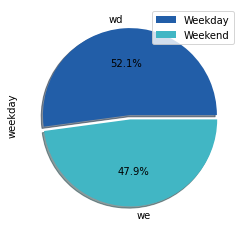

In [297]:
explode=[0,0.05]
colors=['#225ea8','#41b6c4']
labels=['Weekday','Weekend']
pie.plot.pie(autopct = '%1.1f%%',shadow=True,subplots=True,
        colors=colors,explode=explode)
plt.legend(labels=labels)
plt.show()

In [298]:
print('fare_amount : ','minimum =', df_uber.fare_amount.min(),'- maximum=',df_uber.fare_amount.max())
print('pickup_longitude : ', 'minimum =',df_uber.pickup_longitude.min(),'- maximum=', df_uber.pickup_longitude.max())
print('pickup_latitude : ','minimum =', df_uber.pickup_latitude.min(),'- maximum=', df_uber.pickup_latitude.max())
print('dropoff_longitude : ','minimum =',df_uber.dropoff_longitude.min(),'- maximum=', df_uber.dropoff_longitude.max())
print('dropoff_latitude : ','minimum =', df_uber.dropoff_latitude.min(), '- maximum=',df_uber.dropoff_latitude.max())

fare_amount :  minimum = -44.9 - maximum= 500.0
pickup_longitude :  minimum = -3377.6809350000003 - maximum= 2522.271325
pickup_latitude :  minimum = -3116.285383 - maximum= 2621.62843
dropoff_longitude :  minimum = -3383.2966079999997 - maximum= 45.581619
dropoff_latitude :  minimum = -3114.3385670000002 - maximum= 1651.553433


In [299]:
# Since the fare of travel can never be a -ve value so we will be removing them first

df_uber = df_uber[df_uber['fare_amount'] > 0]
print('fare_amount : ','minimum =', df_uber.fare_amount.min(),'- maximum=',df_uber.fare_amount.max())

fare_amount :  minimum = 0.01 - maximum= 500.0


In [300]:

config = {}
with open('config.json', 'w') as f:
    json.dump(config, f)
def remove_outliers(dataset, column):
    Q1 = df_uber[column].quantile(0.25)
    Q2 = df_uber[column].quantile(0.5)
    Q3 = df_uber[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print('Q1 {}, Q2 {}, Q3 {}, IQR {}'.format(Q1, Q2, Q3, IQR))
    print(lower_limit, upper_limit)
    
#     Savung the quartile ranges to remove outliers in free flowing data
    with open('config.json', 'r') as f:
        config = json.load(f)
    config[column] = {}
    config[column]['lower_limit'] = lower_limit
    config[column]['upper_limit'] = upper_limit
    with open('config.json', 'w') as f:
        json.dump(config, f)
    
    return dataset[(dataset[column] > lower_limit) & (dataset[column] < upper_limit)]

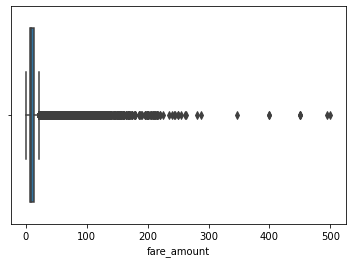

Q1 6.0, Q2 8.5, Q3 12.5, IQR 6.5
-3.75 22.25


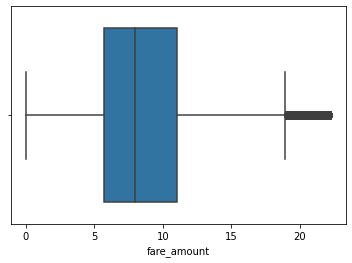

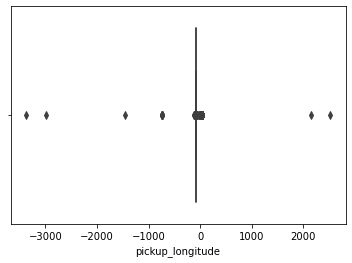

Q1 -73.99234, Q2 -73.982197, Q3 -73.969018, IQR 0.02332199999999318
-74.027323 -73.93403500000002


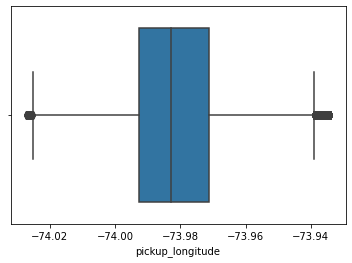

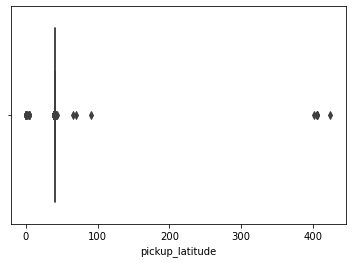

Q1 40.737321, Q2 40.753268, Q3 40.766714, IQR 0.029392999999998892
40.6932315 40.8108035


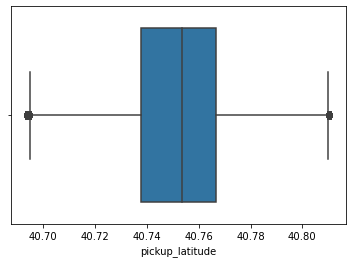

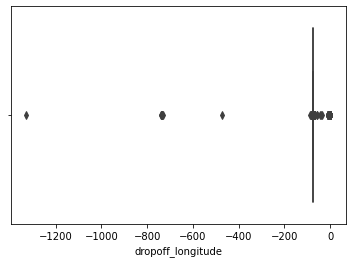

Q1 -73.992005, Q2 -73.98165131, Q3 -73.969094, IQR 0.022911000000007675
-74.02637150000001 -73.93472749999998


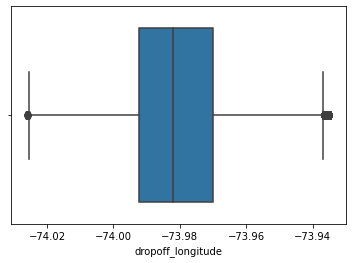

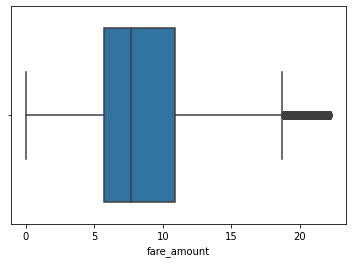

Q1 40.737676500000006, Q2 40.75408173, Q3 40.76775, IQR 0.030073499999993203
40.69256625000001 40.812860249999986


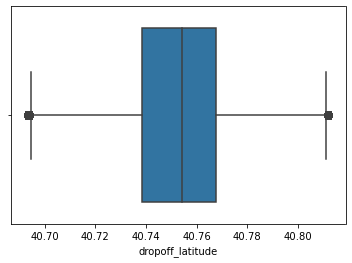

In [301]:
sns.boxplot(df_uber.fare_amount)
plt.show()
df_uber = remove_outliers(df_uber, 'fare_amount')
sns.boxplot(df_uber.fare_amount)
plt.show()

sns.boxplot(df_uber.pickup_longitude)
plt.show()
df_uber = remove_outliers(df_uber, 'pickup_longitude')
sns.boxplot(df_uber.pickup_longitude)
plt.show()

sns.boxplot(df_uber.pickup_latitude)
plt.show()
df_uber = remove_outliers(df_uber, 'pickup_latitude')
sns.boxplot(df_uber.pickup_latitude)
plt.show()

sns.boxplot(df_uber.dropoff_longitude)
plt.show()
df_uber = remove_outliers(df_uber, 'dropoff_longitude')
sns.boxplot(df_uber.dropoff_longitude)
plt.show()

sns.boxplot(df_uber.fare_amount)
plt.show()
df_uber = remove_outliers(df_uber, 'dropoff_latitude')
sns.boxplot(df_uber.dropoff_latitude)
plt.show()

In [302]:

from sklearn.preprocessing import LabelEncoder
# now we have removed all the outliers from the dataset. Now we will move to encode the values in weekdays
le = LabelEncoder()
le.fit(df_uber.weekday)
df_uber['weekday'] = le.transform(df_uber.weekday)

In [303]:
df_uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,weekday
1,1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,5
2,2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,4
3,3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,2
4,4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,5
5,5,50:45.0,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1,2011,1,6,9,4


Changing in some features might help so lets check for those feature tweeking

So we will have the difference between latitute and longitute of the source and destination of travel

In [304]:
df_uber['cov_longitude'] = abs(df_uber['pickup_longitude'] - df_uber['dropoff_longitude'])
df_uber['cov_latitude'] = abs(df_uber['pickup_latitude'] - df_uber['dropoff_latitude'])

In [305]:
df_uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,weekday,cov_longitude,cov_latitude
1,1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,5,0.036780,0.070701
2,2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,4,0.008504,0.010708
3,3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,2,0.004437,0.024949
4,4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,5,0.011440,0.015754
5,5,50:45.0,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1,2011,1,6,9,4,0.028072,0.026603


In [306]:
X = df_uber[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year', 'month', 'day', 'hour', 'weekday', 'cov_longitude', 'cov_latitude']]
y = df_uber.fare_amount

In [307]:
# Splitting data into train and test set
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# LinearRegression moudel to Predict Fare_amount

In [308]:

#LinearRegression moudel
from sklearn.linear_model import LinearRegression

linear=LinearRegression()
linear.fit(x_train,x_test)

LinearRegression()

In [309]:
predictions=linear.predict(y_train)

In [310]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df.head(10)

,Actual,Predicted
677107,7.7,5.954697
809207,9.7,9.948824
584990,21.0,18.797700
381520,4.1,6.412421
840790,6.5,7.631889
298751,12.1,15.563484
811190,5.3,5.373106
496531,4.5,7.263920
459556,9.3,10.495650
945319,9.7,8.065279


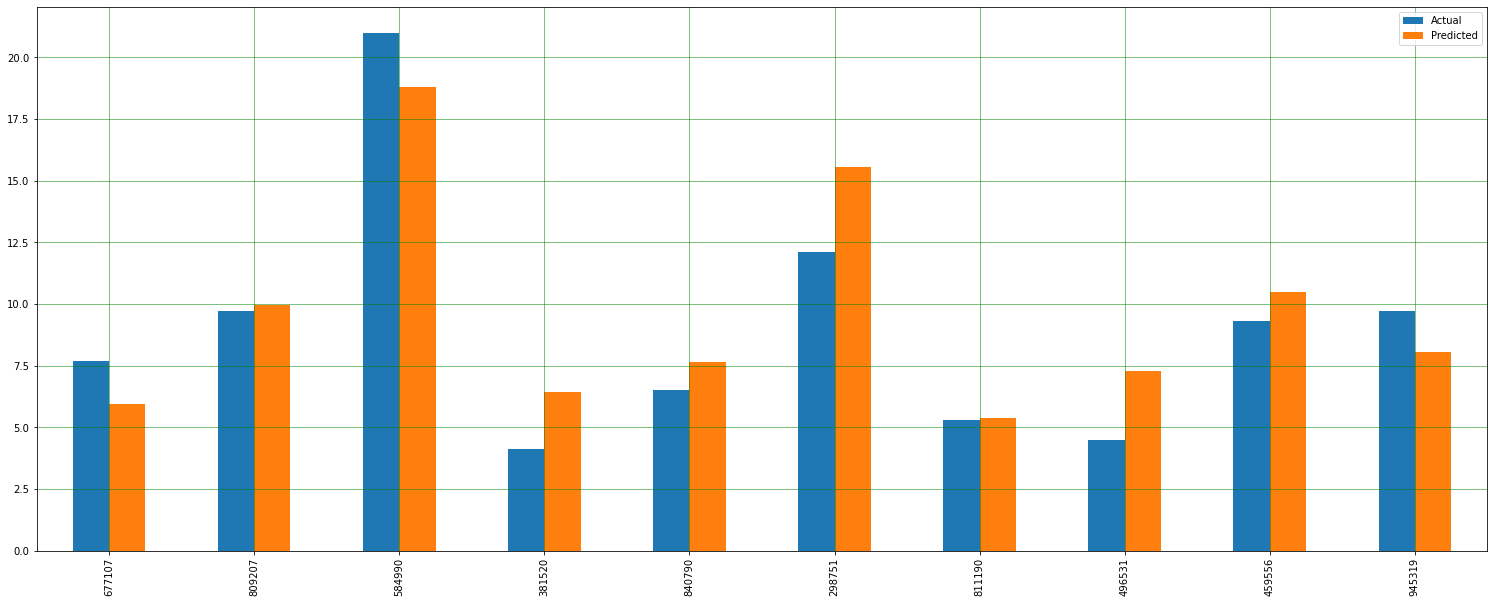

In [311]:
df1 = df.head(10)
df1.plot(kind='bar',figsize=(26,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
plt.show()